In [1]:
import requests
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
plt.rcParams['figure.figsize'] = [16, 5]

In [3]:
emotion_labels = ['time', "angry", "disgust", "fear", "happy", "sad", "surprise", "neutral"]

In [91]:
r = requests.get('http://localhost:8000/records/kratos.mp4?api_key=question')

In [103]:
data_raw = r.json()
len(data_raw)

648

In [104]:
indexes = [i for i, x in enumerate(data_raw) if x[2] == 0]
print(indexes)

[0, 38, 75, 113, 150, 188, 225, 268, 305, 343, 380, 418, 455, 493, 530, 573, 610]


In [79]:
data = data_raw[0:123] + data_raw[184:245] + data_raw[367:]

In [111]:
data = data_raw[305:]

In [112]:
df_raw = pd.DataFrame([x[2:-1] for x in data], columns=emotion_labels)

In [113]:
df_raw.head()

,time,angry,disgust,fear,happy,sad,surprise,neutral
0,0.000000,8.251936,0.032407,19.395008,0.478696,29.672882,1.855300,40.313766
1,0.333333,9.177921,0.049250,22.681555,0.520425,27.191675,2.391649,37.987522
2,0.666667,9.536188,0.043520,25.749655,0.293846,29.448061,1.997161,32.931576
3,1.000000,7.526684,0.041866,17.283518,0.619132,27.635241,1.004893,45.888664
4,1.333333,7.344333,0.021212,14.751232,0.299175,27.288300,0.621926,49.673824


In [114]:
times = df_raw.time.unique()

In [117]:
df = df_raw.groupby('time').mean()
df = df[df.index<12.4]

## Visualize positive and negative emotions against time

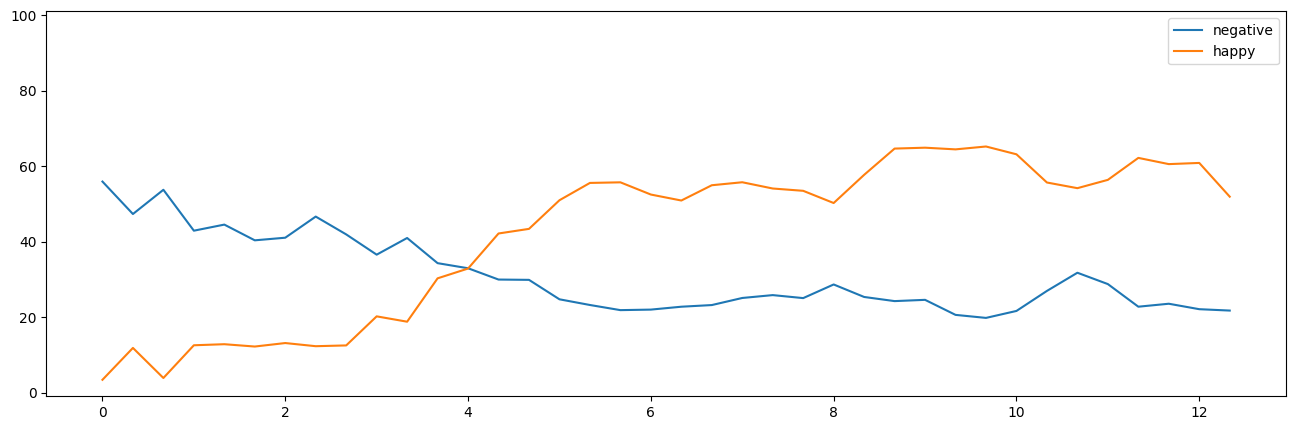

In [118]:
plt.ylim((-1, 101))
plt.plot(df.index,df.angry + df.disgust + df.fear + df.sad, label='negative')
plt.plot(df.index,df.happy, label='happy')
plt.legend()

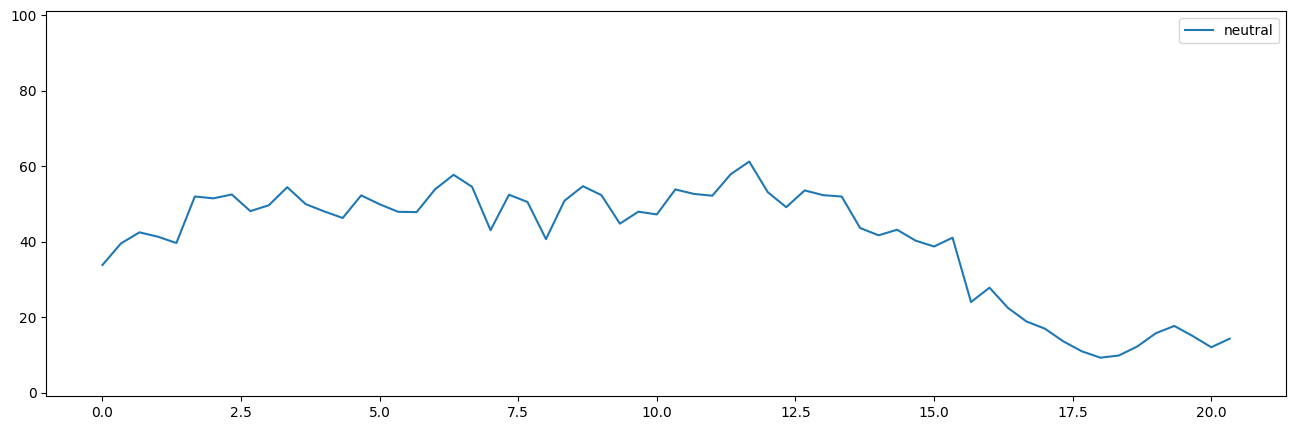

In [89]:
plt.ylim((-1, 101))
plt.plot(df.index,df.neutral, label='neutral')
plt.legend()

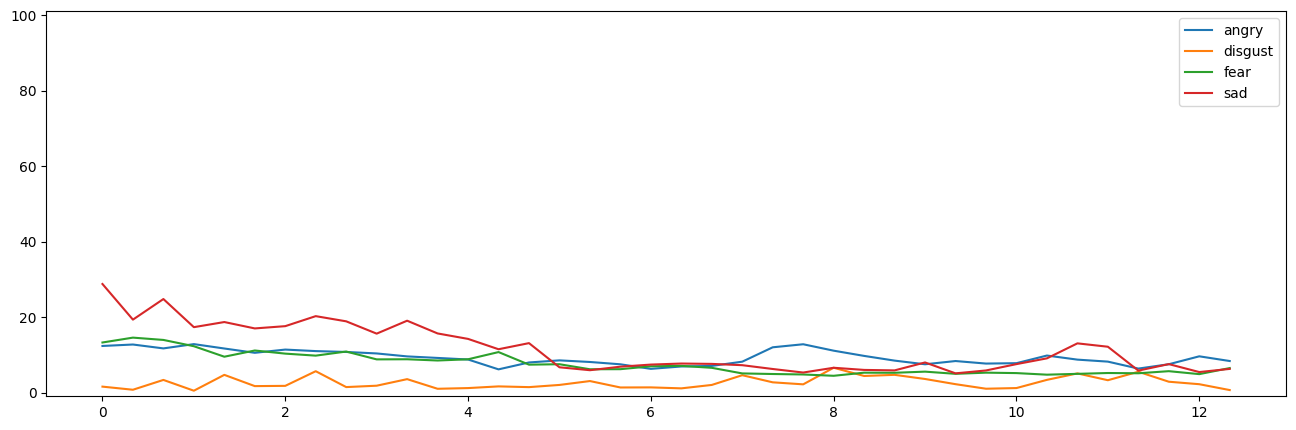

In [119]:
plt.ylim((-1, 101))
plt.plot(df.index,df.angry, label='angry')
plt.plot(df.index,df.disgust, label='disgust')
plt.plot(df.index,df.fear, label='fear')
plt.plot(df.index,df.sad, label='sad')
plt.legend()

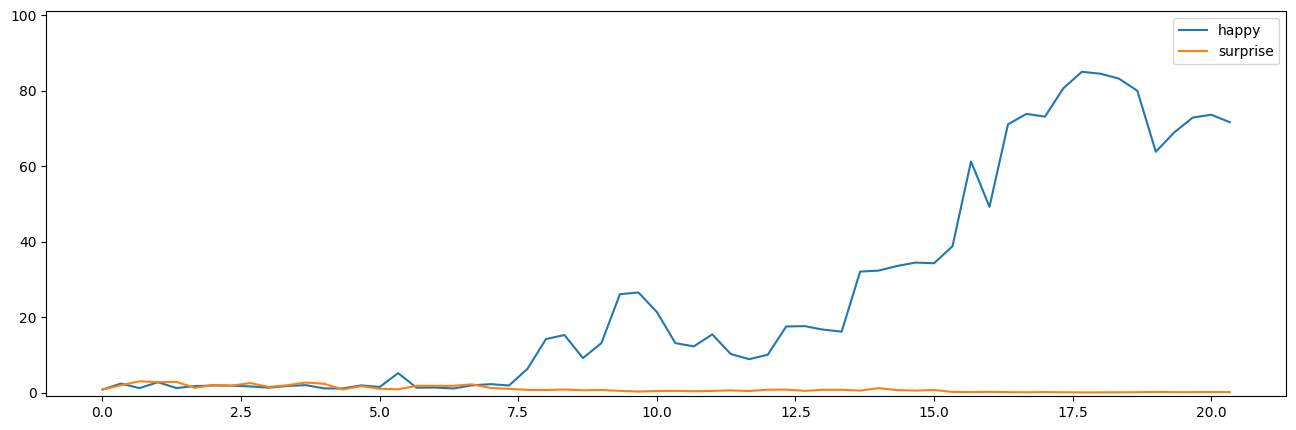

In [90]:
plt.ylim((-1, 101))
plt.plot(df.index,df.happy, label='happy')
plt.plot(df.index,df.surprise, label='surprise')
plt.legend()